# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

Mengimport library yang dibutuhkan

In [7]:
# untuk manipulasi
import pandas as pd
import numpy as np

# untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

meload dataset obesitas

In [8]:
df = pd.read_csv('../obesity-classification_raw.csv')

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

menampilkan sample data dari dataset

In [9]:
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


menampikan type data setiap fitur

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB


mengecek persebaran data

In [11]:
df.describe()

,ID,Age,Height,Weight,BMI
count,108.000000,108.000000,108.000000,108.000000,108.000000
mean,56.046296,46.555556,166.574074,59.490741,20.549074
std,31.917939,24.720620,27.873615,28.856233,7.583818
min,1.000000,11.000000,120.000000,10.000000,3.900000
25%,28.750000,27.000000,140.000000,35.000000,16.700000
50%,56.500000,42.500000,175.000000,55.000000,21.200000
75%,83.250000,59.250000,190.000000,85.000000,26.100000
max,110.000000,112.000000,210.000000,120.000000,37.200000


visualisasi distribusi data dari masing masing fitur

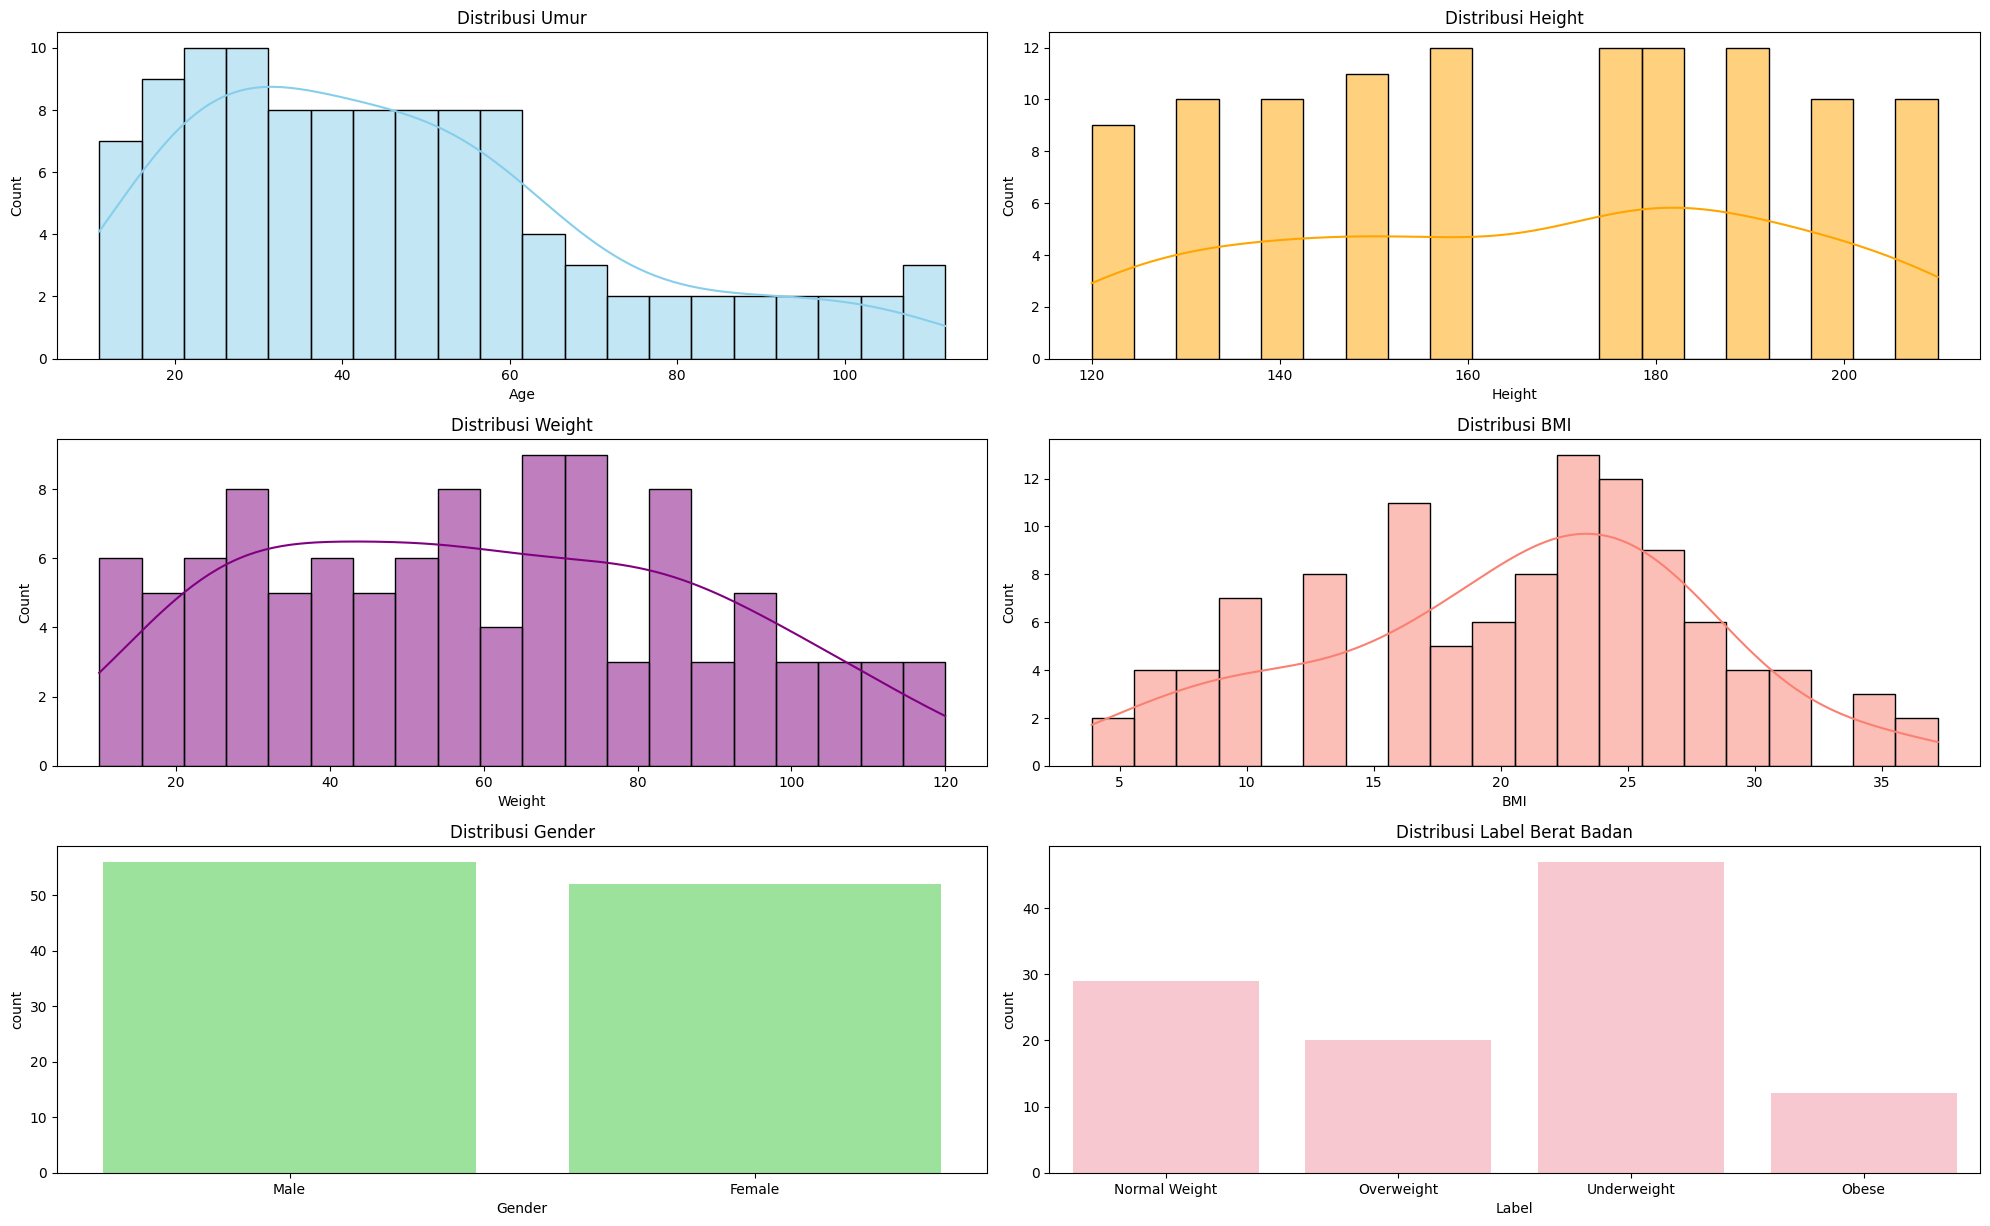

In [12]:
plt.figure(figsize=(20, 16))  # Lebar dan tinggi canvas

# Plot 1
plt.subplot(4, 2, 1)
sns.histplot(data=df, x='Age', bins=20, kde=True, color='skyblue')
plt.title('Distribusi Umur')

# Plot 2
plt.subplot(4, 2, 2)
sns.histplot(data=df, x='Height', bins=20, kde=True, color='orange')
plt.title('Distribusi Height')

# Plot 3
plt.subplot(4, 2, 3)
sns.histplot(data=df, x='Weight', bins=20, kde=True, color='purple')
plt.title('Distribusi Weight')

# Plot 4
plt.subplot(4, 2, 4)
sns.histplot(data=df, x='BMI', bins=20, kde=True, color='salmon')
plt.title('Distribusi BMI')

plt.subplot(4, 2, 5)
sns.countplot(data=df, x='Gender', color='lightgreen')
plt.title('Distribusi Gender')

plt.subplot(4, 2, 6)
sns.countplot(data=df, x='Label', color='pink')
plt.title('Distribusi Label Berat Badan')

plt.tight_layout()
plt.show()

pairplot data numerikal

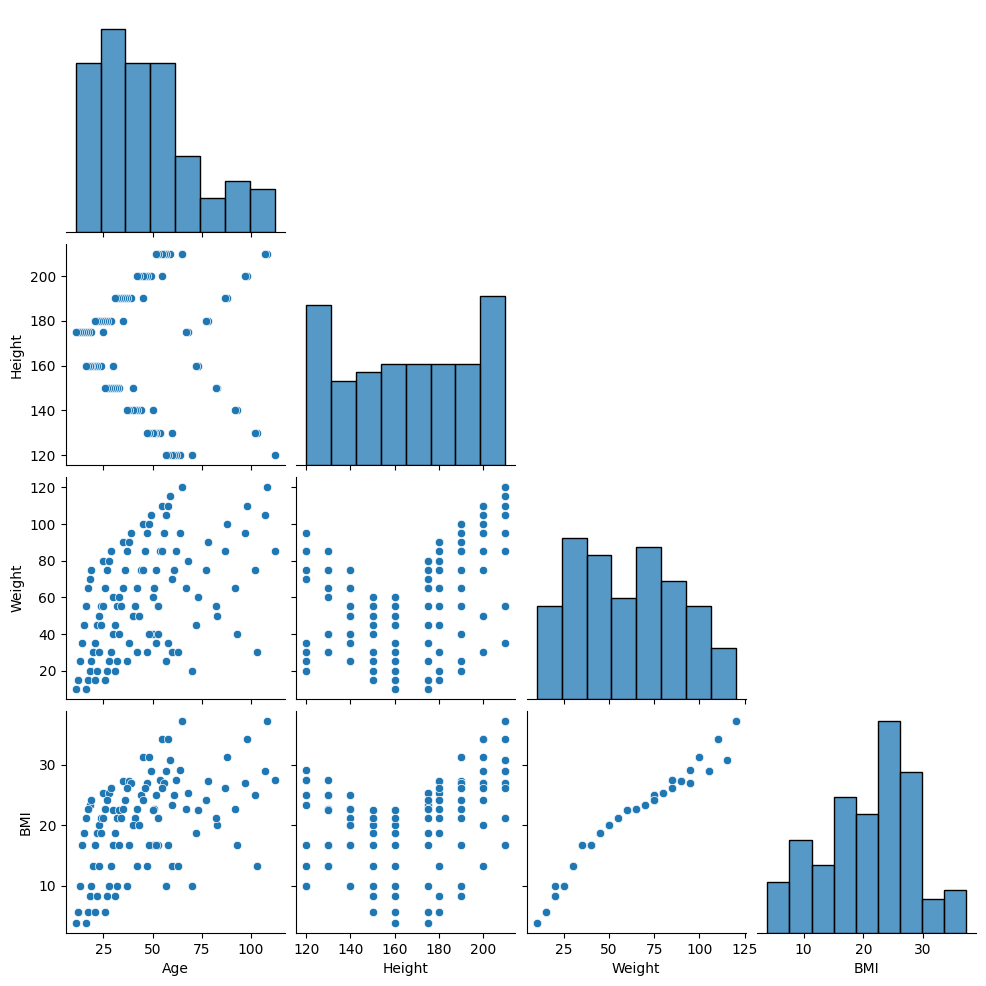

In [13]:
sns.pairplot(df[['Age', 'Height', 'Weight', 'BMI']], corner=True)

perbandingan fitur label dan gender

<Axes: xlabel='Label', ylabel='count'>

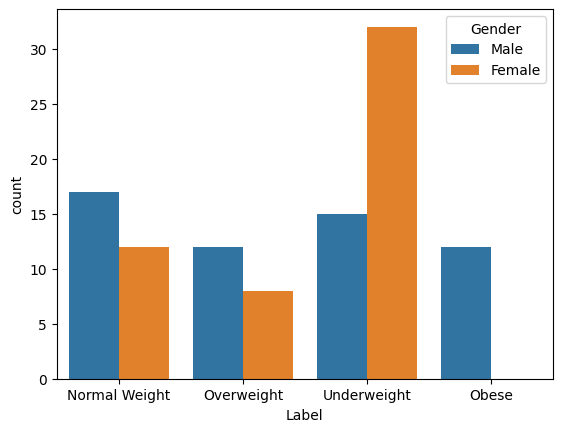

In [14]:
sns.countplot(data=df, x='Label', hue='Gender')

mencari korelasi antar variabel numerik

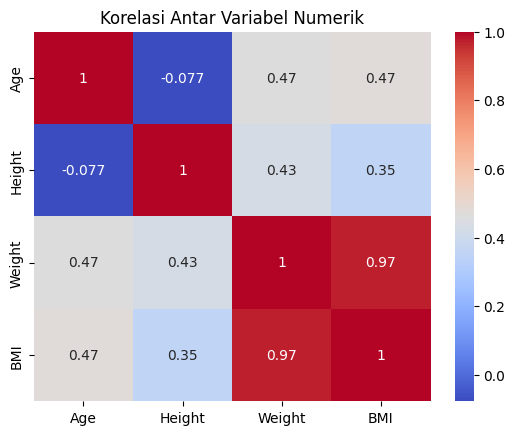

In [15]:
corr = df[['Age', 'Height', 'Weight', 'BMI']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Variabel Numerik')
plt.show()

mencari outlier pada variabel numerik

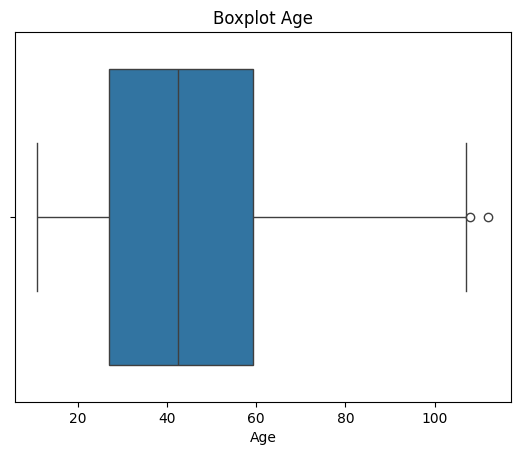

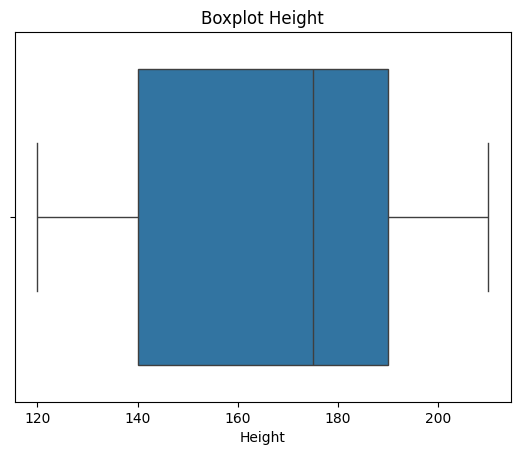

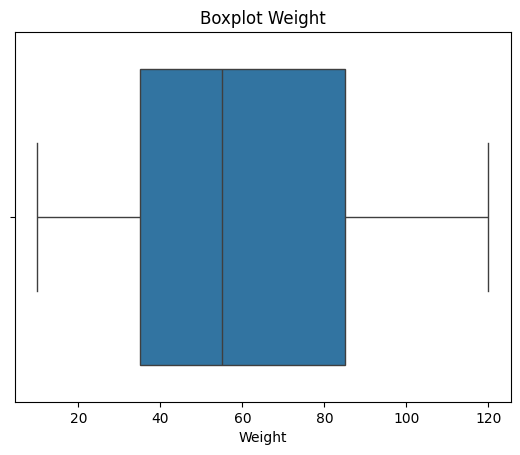

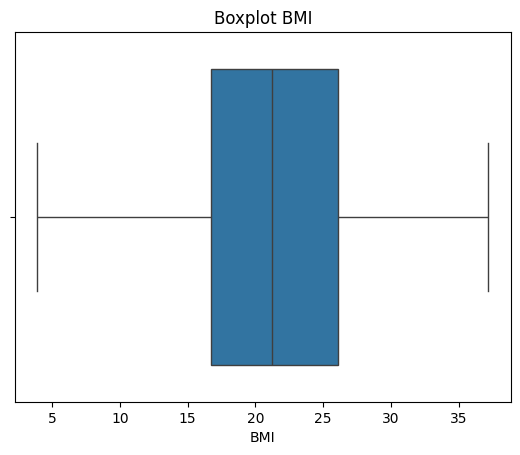

In [16]:
for col in ['Age', 'Height', 'Weight', 'BMI']:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot {col}')
    plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

mencari missing value

In [17]:
df.isnull().sum()

ID        0
Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64

mencari nilai duplikat

In [18]:
df.duplicated().sum()

np.int64(0)

mencari nilai yang tidak konsisten

In [19]:
df['Label'].unique()

array(['Normal Weight', 'Overweight', 'Underweight', 'Obese'],
      dtype=object)

In [20]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

cek kembali nilai outlier

In [21]:
# 1. Hitung IQR
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# 2. Hitung batas bawah dan atas
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

# 3. Buat dataframe baru tanpa outlier
df_clean = df[(df['Age'] >= batas_bawah) & (df['Age'] <= batas_atas)]

# 4. (Opsional) Lihat berapa yang dibuang
print(f"Data awal: {len(df)}")
print(f"Data bersih: {len(df_clean)}")
print(f"Outlier dihapus: {len(df) - len(df_clean)}")

Data awal: 108
Data bersih: 106
Outlier dihapus: 2


menghapus kolom id karena tidak diperlukan untuk membangun model

In [22]:
df = df.drop(columns=['ID'])

standarisasi fitur numerik dengan standard scaler

In [23]:
numeric_cols = ['Age', 'Height', 'Weight', 'BMI']
scaler = StandardScaler()
scaled_numeric = scaler.fit_transform(df[numeric_cols])
scaled_numeric_df = pd.DataFrame(scaled_numeric, columns=numeric_cols)

encoding data kategorikal dengan one hot encoding

In [25]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_gender = encoder.fit_transform(df[['Gender']])
encoded_gender_df = pd.DataFrame(encoded_gender, columns=encoder.get_feature_names_out(['Gender']))

encoding target label denag label endoding

In [26]:
label_map = {
    'Underweight': 0,
    'Normal Weight': 1,
    'Overweight': 2,
    'Obese': 3
}
df['Label_encoded'] = df['Label'].map(label_map)

# 5. Gabungkan semua ke satu DataFrame
final_df = pd.concat([scaled_numeric_df, encoded_gender_df, df['Label_encoded']], axis=1)

In [27]:
final_df.to_csv("obesity-classification_preprocessing.csv", index=False)